In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [54]:
len(x_test)


10000

In [55]:
len(x_train)

60000

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
x_train = x_train/255
x_test = x_test/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<Figure size 432x288 with 0 Axes>

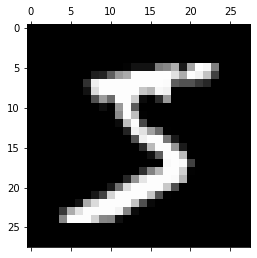

In [58]:
plt.gray()
plt.matshow(x_train[0])

In [59]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)

In [60]:
x_test_flat.shape

(10000, 784)

In [61]:
x_train_flat.shape

(60000, 784)

In [62]:
x_test_flat[0]
y_train[0:11]
y_test[0:11]
len(y_test)


10000

In [63]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4734 - accuracy: 0.8766: 0s - los
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9257


In [79]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9772


[0.08326780796051025, 0.9771999716758728]

In [80]:
y_predict = model.predict(x_test_flat)

In [81]:
y_predict[0]

array([1.5893496e-05, 1.0971841e-07, 2.4423003e-04, 9.0504992e-01,
       1.9299264e-08, 2.1460979e-05, 4.7582954e-10, 9.9999183e-01,
       2.9527307e-02, 4.9772263e-02], dtype=float32)

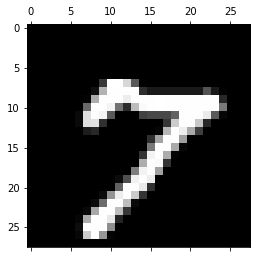

In [82]:
plt.matshow(x_test[9000])

In [83]:
np.argmax(y_predict[9001])
y_predict[9001]

array([1.0499287e-01, 3.4251809e-04, 5.3980529e-02, 2.1497153e-05,
       3.9262235e-02, 5.9626997e-03, 1.0000000e+00, 1.2497363e-08,
       2.3297369e-03, 3.8382709e-03], dtype=float32)

In [84]:
y_predict_label = [np.argmax(i) for i in y_predict]

In [85]:
y_predict_label[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [86]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    0,    0,    0,    0,    6,    0,    3,    2],
       [   0, 1127,    2,    0,    0,    0,    2,    0,    4,    0],
       [   2,    3, 1011,    0,    1,    0,    2,    4,    9,    0],
       [   0,    0,    4,  988,    0,    3,    1,    4,    6,    4],
       [   1,    0,    1,    1,  956,    0,    8,    3,    2,   10],
       [   3,    1,    0,   20,    1,  846,   10,    1,    6,    4],
       [   4,    3,    2,    0,    2,    1,  946,    0,    0,    0],
       [   3,    6,   10,    2,    0,    0,    0,  997,    2,    8],
       [   5,    0,    5,    4,    2,    1,    2,    2,  950,    3],
       [   1,    2,    0,    4,    9,    1,    0,    6,    3,  983]])>

Text(51.0, 0.5, 'Truth')

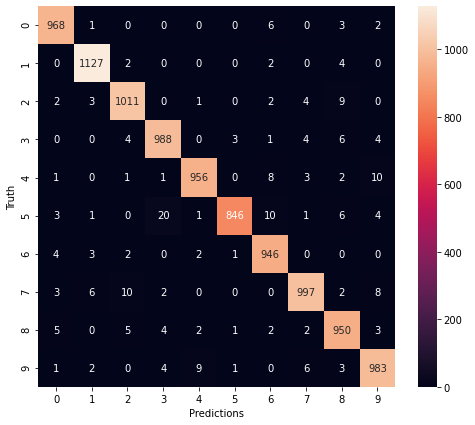

In [87]:
import seaborn as sn
plt.figure(figsize=(8,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [93]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2680 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1207 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0844 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9801: 
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9847


In [94]:
model.evaluate(x_test_flat, y_test)
y_predict = model.predict(x_test_flat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0788 - accuracy: 0.9759


In [95]:
y_predict_label = [np.argmax(i) for i in y_predict]

In [96]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    1,    1,    1,    0,    1,    1,    1],
       [   0, 1129,    3,    1,    0,    1,    1,    0,    0,    0],
       [   8,    7,  995,    2,    3,    0,    1,    6,    9,    1],
       [   0,    0,    2,  986,    1,    4,    0,    6,    5,    6],
       [   0,    0,    5,    0,  956,    0,    2,    2,    0,   17],
       [   3,    1,    0,   15,    2,  862,    3,    0,    4,    2],
       [   9,    3,    0,    2,    5,    2,  933,    0,    4,    0],
       [   1,    7,    8,    1,    2,    0,    0, 1002,    1,    6],
       [   5,    1,    4,    6,    4,    4,    2,    2,  939,    7],
       [   2,    3,    0,    5,    6,    1,    0,    9,    0,  983]])>

Text(51.0, 0.5, 'Truth')

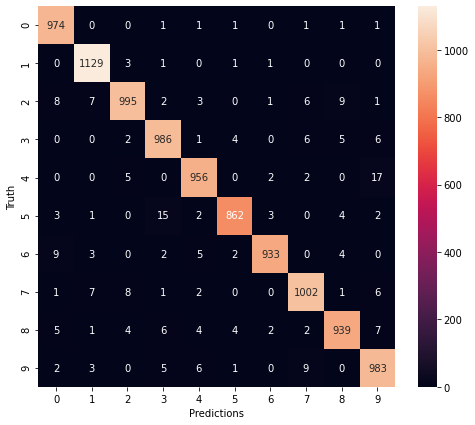

In [97]:
import seaborn as sn
plt.figure(figsize=(8,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [100]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2170 - accuracy: 0.9351
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0894 - accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0625 - accuracy: 0.9805
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9843: 0s - loss: 0.047
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0371 - accuracy: 0.9878


In [101]:
model.evaluate(x_test_flat, y_test)
y_predict = model.predict(x_test_flat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0871 - accuracy: 0.9760


In [102]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6257 - accuracy: 0.8436
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3314 - accuracy: 0.9071: 1s - loss: 0.3409 - 
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2526 - accuracy: 0.9287: 0s
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2287 - accuracy: 0.9361


In [103]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
td_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/")
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flat, y_train, epochs=5, callbacks=[td_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6329 - accuracy: 0.8440: 2s - loss: 0.8
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3307 - accuracy: 0.9071: 0s - loss: 0.3311 - accuracy
Epoch 3/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2831 - accuracy: 0.92 - 4s 2ms/step - loss: 0.2829 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2524 - accuracy: 0.9289:  -
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2289 - accuracy: 0.9360: 0s


In [106]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2115 - accuracy: 0.9389


[0.2115088850259781, 0.9388999938964844]

In [107]:
%load_ext tensorboard
%tensorboard --logdir logs/fit